# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import requests
import time
import re
import warnings
warnings.filterwarnings("ignore")

### Identify the URL

In [2]:
url='https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

### request the html code from specified url

In [3]:
page=requests.get(url)

### response of the requested code

In [4]:
page.status_code

200

In [5]:
htmlcode=page.text

In [6]:
soup=BeautifulSoup(htmlcode)

### code for extracting the required data

In [7]:
#empty lists
productname = [] 
price = []
rating = []
features = []

# extracting data from1 to 24 pages of the website
for i in range(1,25): 
    
    url = 'https://www.flipkart.com/search?q=smart+phones&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={}'.format(i)
    page = requests.get(url)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)
   
    # extracting the data through class id's
    
    for x in soup.find_all('div', attrs={'class':'_3pLy-c row'}):
        pname = x.find('div', attrs = {'class':'_4rR01T'})
        cost = x.find('div', attrs = {'class':'_30jeq3 _1_WHN1'})
        rat = x.find('div', attrs = {'class':'_3LWZlK'})
        specs = x.find('div', attrs = {'class':'fMghEO'})
        
        #storing the data into list
        if pname is None:
            productname.append(np.NaN)
        else:
            productname.append(pname.text)
            
        if cost is None:
            price.append(np.NaN)
        else:
            price.append(cost.text)
            
        if rat is None:
            rating.append(np.NaN)
        else:
            rating.append(rat.text)
            
        if specs is None:
            features.append(np.NaN)
        else:
            features.append(specs.text)
            
        

In [8]:
len(productname)

552

In [9]:
#list of data extracted from the webpage
productname

['Infinix HOT 20 Play (Racing Black, 64 GB)',
 'Infinix HOT 20 Play (Fantasy Purple, 64 GB)',
 'Infinix HOT 20 Play (Luna Blue, 64 GB)',
 'POCO C31 (Shadow Gray, 64 GB)',
 'Infinix HOT 20 Play (Aurora Green, 64 GB)',
 'REDMI 10 (Caribbean Green, 64 GB)',
 'REDMI 9i Sport (Carbon Black, 64 GB)',
 'APPLE iPhone 11 (White, 128 GB)',
 'REDMI 10 (Midnight Black, 64 GB)',
 'SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)',
 'MOTOROLA g52 (Charcoal Grey, 128 GB)',
 'vivo T1 44W (Starry Sky, 128 GB)',
 'vivo T1 44W (Midnight Galaxy, 128 GB)',
 'MOTOROLA G62 5G (Midnight Gray, 128 GB)',
 'MOTOROLA G62 5G (Frosted Blue, 128 GB)',
 'MOTOROLA g52 (Charcoal Grey, 64 GB)',
 'MOTOROLA G62 5G (Frosted Blue, 128 GB)',
 'POCO C31 (Shadow Gray, 32 GB)',
 'POCO M4 Pro (Cool Blue, 64 GB)',
 'vivo T1 44W (Midnight Galaxy, 128 GB)',
 'MOTOROLA G32 (Mineral Gray, 64 GB)',
 'SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)',
 'MOTOROLA g31 (Baby Blue, 64 GB)',
 'POCO C31 (Royal Blue, 64 GB)',
 'MOTOROLA G62 5G (Frosted B

### create a dataframe

In [10]:
mobile=pd.DataFrame({'Product_Name': productname,'Price':price,'Rating':rating, 'Features':features})

In [11]:
mobile.head()

,Product_Name,Price,Rating,Features
0,"Infinix HOT 20 Play (Racing Black, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...
1,"Infinix HOT 20 Play (Fantasy Purple, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...
2,"Infinix HOT 20 Play (Luna Blue, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...
3,"POCO C31 (Shadow Gray, 64 GB)","₹7,499",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
4,"Infinix HOT 20 Play (Aurora Green, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...


In [12]:
mobile.describe(include='all')

,Product_Name,Price,Rating,Features
count,552,552,550,552
unique,452,172,13,285
top,"vivo T1 44W (Starry Sky, 128 GB)","₹15,999",4.3,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
freq,3,25,170,6


### convert dataframe into .csv file

In [13]:
df=mobile.to_csv('mobile.csv')

In [14]:
mobile['Color']=mobile['Product_Name'].apply(lambda x: x.split('(')[1].split(',')[0])

In [15]:
mobile.head()

,Product_Name,Price,Rating,Features,Color
0,"Infinix HOT 20 Play (Racing Black, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,Racing Black
1,"Infinix HOT 20 Play (Fantasy Purple, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,Fantasy Purple
2,"Infinix HOT 20 Play (Luna Blue, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,Luna Blue
3,"POCO C31 (Shadow Gray, 64 GB)","₹7,499",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,Shadow Gray
4,"Infinix HOT 20 Play (Aurora Green, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,Aurora Green


In [16]:
#removing unwanted names
for i in range(0,len(mobile)):

     a=mobile['Color'][i].split(' ')[-1]
     mobile['Color'][i]=a
    

In [17]:
#converting data into lower case
for i in range(0,len(mobile)):

     a=mobile['Color'][i].lower()
     mobile['Color'][i]=a

In [18]:
mobile['Color'].unique()

array(['black', 'purple', 'blue', 'gray', 'green', 'white', 'grey', 'sky',
       'galaxy', 'silver', 'blush', 'copper', 'yellow', 'cyan', 'lily',
       'gold', 'matter', 'midnight', 'sea', 'starlight', 'dusk', 'pearl',
       'hyperspace', 'chalk', 'rose', 'fantasy', 'tide', 'snowfall',
       'orange', 'charcoal', 'flame', 'mint', 'ocean', 'carbon', 'glow',
       'red', 'moonless', 'mirror', '', 'pink', 'waves', 'night',
       'bronze', 'graphite', 'lemongrass', 'obsidian', 'luster', 'brown',
       'lavender', 'dream', 'violet', 'snow', 'cream', 'wave', 'rage',
       'coral', 'sierra', 'peach', 'champagne'], dtype=object)

In [19]:
# creating Brand column and extracting data from another column using regex
mobile['Brand']=mobile['Product_Name'].apply(lambda x: re.findall('^\w+',x))

In [20]:
mobile.tail()

,Product_Name,Price,Rating,Features,Color,Brand
547,"vivo Y21A (Midnight Blue, 64 GB)","₹13,489",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,blue,[vivo]
548,"MOTOROLA G40 Fusion (Frosted Champagne, 64 GB)","₹14,499",4.2,4 GB RAM | 64 GB ROM17.22 cm (6.78 inch) Full ...,champagne,[MOTOROLA]
549,"POCO F4 5G (Night Black, 128 GB)","₹27,999",4.3,8 GB RAM | 128 GB ROM16.94 cm (6.67 inch) Full...,black,[POCO]
550,"Tecno Pova 3 (Eco Black, 64 GB)","₹10,888",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,black,[Tecno]
551,"REDMI 9i (Sea Blue, 64 GB)","₹7,499",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,blue,[REDMI]


In [21]:
mobile['ROM']=mobile['Product_Name'].apply(lambda x: re.findall('[\w\s]+GB',x))

In [22]:
mobile.head()

,Product_Name,Price,Rating,Features,Color,Brand,ROM
0,"Infinix HOT 20 Play (Racing Black, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,black,[Infinix],[ 64 GB]
1,"Infinix HOT 20 Play (Fantasy Purple, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,purple,[Infinix],[ 64 GB]
2,"Infinix HOT 20 Play (Luna Blue, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,blue,[Infinix],[ 64 GB]
3,"POCO C31 (Shadow Gray, 64 GB)","₹7,499",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,gray,[POCO],[ 64 GB]
4,"Infinix HOT 20 Play (Aurora Green, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,green,[Infinix],[ 64 GB]


In [23]:
mobile['RAM']=mobile['Features'].apply(lambda x: re.findall('[\w\s]+GB RAM',x))

In [24]:
mobile.head()

,Product_Name,Price,Rating,Features,Color,Brand,ROM,RAM
0,"Infinix HOT 20 Play (Racing Black, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,black,[Infinix],[ 64 GB],[4 GB RAM]
1,"Infinix HOT 20 Play (Fantasy Purple, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,purple,[Infinix],[ 64 GB],[4 GB RAM]
2,"Infinix HOT 20 Play (Luna Blue, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,blue,[Infinix],[ 64 GB],[4 GB RAM]
3,"POCO C31 (Shadow Gray, 64 GB)","₹7,499",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,gray,[POCO],[ 64 GB],[4 GB RAM]
4,"Infinix HOT 20 Play (Aurora Green, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,green,[Infinix],[ 64 GB],[4 GB RAM]


In [25]:
mobile['Screen_Size']=mobile['Features'].apply(lambda x: re.findall('[\w\s].[\w\s]+inch',x))

In [26]:
mobile

,Product_Name,Price,Rating,Features,Color,Brand,ROM,RAM,Screen_Size
0,"Infinix HOT 20 Play (Racing Black, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,black,[Infinix],[ 64 GB],[4 GB RAM],[6.82 inch]
1,"Infinix HOT 20 Play (Fantasy Purple, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,purple,[Infinix],[ 64 GB],[4 GB RAM],[6.82 inch]
2,"Infinix HOT 20 Play (Luna Blue, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,blue,[Infinix],[ 64 GB],[4 GB RAM],[6.82 inch]
3,"POCO C31 (Shadow Gray, 64 GB)","₹7,499",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,gray,[POCO],[ 64 GB],[4 GB RAM],[6.53 inch]
4,"Infinix HOT 20 Play (Aurora Green, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,green,[Infinix],[ 64 GB],[4 GB RAM],[6.82 inch]
...,...,...,...,...,...,...,...,...,...
547,"vivo Y21A (Midnight Blue, 64 GB)","₹13,489",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,blue,[vivo],[ 64 GB],[4 GB RAM],[6.51 inch]
548,"MOTOROLA G40 Fusion (Frosted Champagne, 64 GB)","₹14,499",4.2,4 GB RAM | 64 GB ROM17.22 cm (6.78 inch) Full ...,champagne,[MOTOROLA],[ 64 GB],[4 GB RAM],[6.78 inch]
549,"POCO F4 5G (Night Black, 128 GB)","₹27,999",4.3,8 GB RAM | 128 GB ROM16.94 cm (6.67 inch) Full...,black,[POCO],[ 128 GB],[8 GB RAM],[6.67 inch]
550,"Tecno Pova 3 (Eco Black, 64 GB)","₹10,888",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,black,[Tecno],[ 64 GB],[4 GB RAM],[6.9 inch]


In [27]:
# removing unwanted characters from each column
mobile.Brand= mobile.Brand.apply(lambda x: ''.join(x))
mobile.ROM= mobile.ROM.apply(lambda x: ''.join(x))
mobile.Screen_Size=mobile.Screen_Size.apply(lambda x: ''.join(x))
mobile.RAM= mobile.RAM.apply(lambda x: ''.join(x))


In [89]:
df['Brand']=df["Brand"].apply(lambda x: x.lower())
df['Brand']

0       infinix
1       infinix
2       infinix
3          poco
4       infinix
         ...   
510        vivo
511    motorola
512        poco
513       tecno
514       redmi
Name: Brand, Length: 515, dtype: object

In [28]:
mobile

,Product_Name,Price,Rating,Features,Color,Brand,ROM,RAM,Screen_Size
0,"Infinix HOT 20 Play (Racing Black, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,black,Infinix,64 GB,4 GB RAM,6.82 inch
1,"Infinix HOT 20 Play (Fantasy Purple, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,purple,Infinix,64 GB,4 GB RAM,6.82 inch
2,"Infinix HOT 20 Play (Luna Blue, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,blue,Infinix,64 GB,4 GB RAM,6.82 inch
3,"POCO C31 (Shadow Gray, 64 GB)","₹7,499",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,gray,POCO,64 GB,4 GB RAM,6.53 inch
4,"Infinix HOT 20 Play (Aurora Green, 64 GB)","₹8,199",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,green,Infinix,64 GB,4 GB RAM,6.82 inch
...,...,...,...,...,...,...,...,...,...
547,"vivo Y21A (Midnight Blue, 64 GB)","₹13,489",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,blue,vivo,64 GB,4 GB RAM,6.51 inch
548,"MOTOROLA G40 Fusion (Frosted Champagne, 64 GB)","₹14,499",4.2,4 GB RAM | 64 GB ROM17.22 cm (6.78 inch) Full ...,champagne,MOTOROLA,64 GB,4 GB RAM,6.78 inch
549,"POCO F4 5G (Night Black, 128 GB)","₹27,999",4.3,8 GB RAM | 128 GB ROM16.94 cm (6.67 inch) Full...,black,POCO,128 GB,8 GB RAM,6.67 inch
550,"Tecno Pova 3 (Eco Black, 64 GB)","₹10,888",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,black,Tecno,64 GB,4 GB RAM,6.9 inch


In [29]:
mobile.Price=mobile.Price.apply(lambda x:x.replace('₹','').replace(',','')).astype(float)



In [30]:
mobile.Product_Name=mobile.Product_Name.apply(lambda x: x.split('('))
mobile.Product_Name=mobile.Product_Name.apply(lambda x: x[0])

In [31]:
# filling NaN values
mobile=mobile.fillna(method='bfill')

In [32]:
# removing duplicates from the dataframe
mobile=mobile.drop_duplicates(keep='first')

In [33]:
# reseting the index
mobile.reset_index(inplace = True, drop = True)

In [34]:
mobile.RAM=mobile.RAM.apply(lambda x: x.replace('RAM',''))

In [35]:
mobile

,Product_Name,Price,Rating,Features,Color,Brand,ROM,RAM,Screen_Size
0,Infinix HOT 20 Play,8199.0,4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,black,Infinix,64 GB,4 GB,6.82 inch
1,Infinix HOT 20 Play,8199.0,4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,purple,Infinix,64 GB,4 GB,6.82 inch
2,Infinix HOT 20 Play,8199.0,4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,blue,Infinix,64 GB,4 GB,6.82 inch
3,POCO C31,7499.0,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,gray,POCO,64 GB,4 GB,6.53 inch
4,Infinix HOT 20 Play,8199.0,4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,green,Infinix,64 GB,4 GB,6.82 inch
...,...,...,...,...,...,...,...,...,...
510,vivo Y21A,13489.0,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,blue,vivo,64 GB,4 GB,6.51 inch
511,MOTOROLA G40 Fusion,14499.0,4.2,4 GB RAM | 64 GB ROM17.22 cm (6.78 inch) Full ...,champagne,MOTOROLA,64 GB,4 GB,6.78 inch
512,POCO F4 5G,27999.0,4.3,8 GB RAM | 128 GB ROM16.94 cm (6.67 inch) Full...,black,POCO,128 GB,8 GB,6.67 inch
513,Tecno Pova 3,10888.0,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,black,Tecno,64 GB,4 GB,6.9 inch


In [36]:
mobile.to_csv('mobile.csv',index=False)

In [37]:
# reading the csv file
df=pd.read_csv('mobile.csv')

In [90]:
df

,Product_Name,Price,Rating,Features,Color,Brand,ROM,RAM,Screen_Size
0,Infinix HOT 20 Play,8199.0,4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,black,infinix,64 GB,4 GB,6.82 inch
1,Infinix HOT 20 Play,8199.0,4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,purple,infinix,64 GB,4 GB,6.82 inch
2,Infinix HOT 20 Play,8199.0,4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,blue,infinix,64 GB,4 GB,6.82 inch
3,POCO C31,7499.0,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,gray,poco,64 GB,4 GB,6.53 inch
4,Infinix HOT 20 Play,8199.0,4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,green,infinix,64 GB,4 GB,6.82 inch
...,...,...,...,...,...,...,...,...,...
510,vivo Y21A,13489.0,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,blue,vivo,64 GB,4 GB,6.51 inch
511,MOTOROLA G40 Fusion,14499.0,4.2,4 GB RAM | 64 GB ROM17.22 cm (6.78 inch) Full ...,champagne,motorola,64 GB,4 GB,6.78 inch
512,POCO F4 5G,27999.0,4.3,8 GB RAM | 128 GB ROM16.94 cm (6.67 inch) Full...,black,poco,128 GB,8 GB,6.67 inch
513,Tecno Pova 3,10888.0,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,black,tecno,64 GB,4 GB,6.9 inch


In [41]:
df=df.fillna(method='bfill')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_Name  515 non-null    object 
 1   Price         515 non-null    float64
 2   Rating        515 non-null    float64
 3   Features      515 non-null    object 
 4   Color         515 non-null    object 
 5   Brand         515 non-null    object 
 6   ROM           515 non-null    object 
 7   RAM           515 non-null    object 
 8   Screen_Size   515 non-null    object 
dtypes: float64(2), object(7)
memory usage: 36.3+ KB


# Data Visualization

## uni-variant analysis

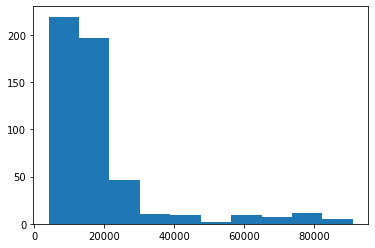

In [43]:
# histogram based on price
plt.hist(df['Price'])
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

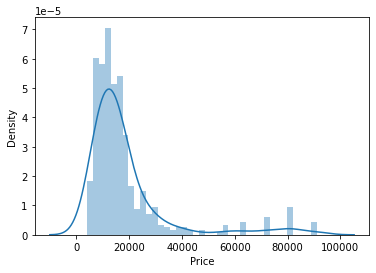

In [44]:
sns.distplot(df['Price'])

<AxesSubplot:xlabel='Rating'>

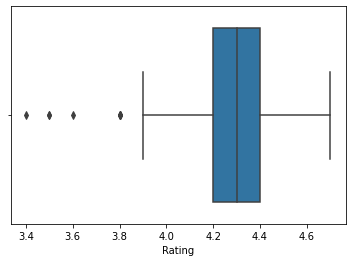

In [45]:
sns.boxplot(df['Rating'])

<AxesSubplot:xlabel='Brand', ylabel='count'>

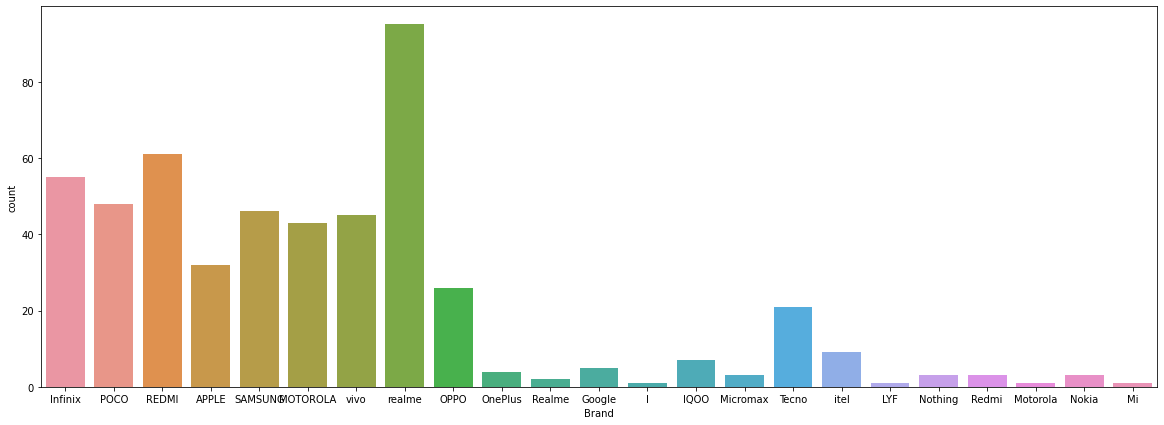

In [46]:
plt.figure(figsize=(20,7))
sns.countplot(df['Brand'])

<AxesSubplot:>

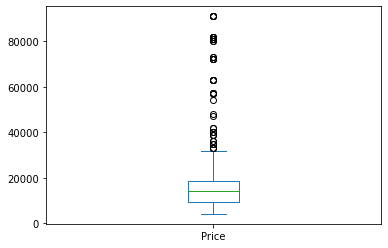

In [47]:
df['Price'].plot(kind = 'box')

## bi-variant analysis

<AxesSubplot:xlabel='Price', ylabel='Rating'>

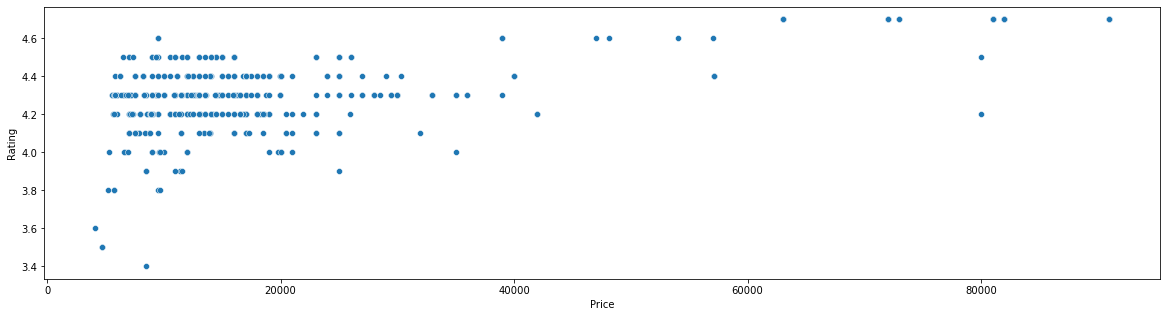

In [48]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='Price',y='Rating',data=df)

<AxesSubplot:xlabel='Brand', ylabel='Price'>

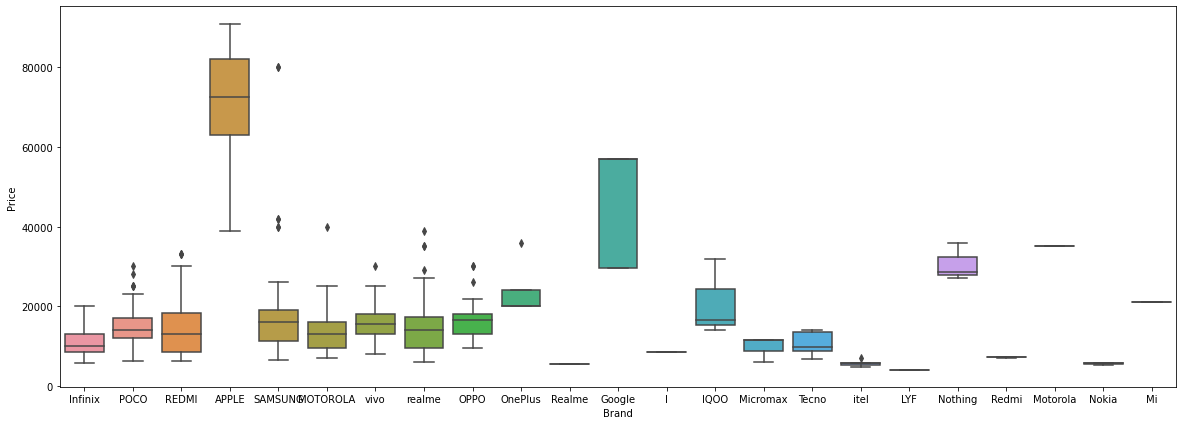

In [49]:
plt.figure(figsize=(20,7))
sns.boxplot(x=mobile.Brand,y=mobile.Price)

<AxesSubplot:xlabel='Rating', ylabel='Brand'>

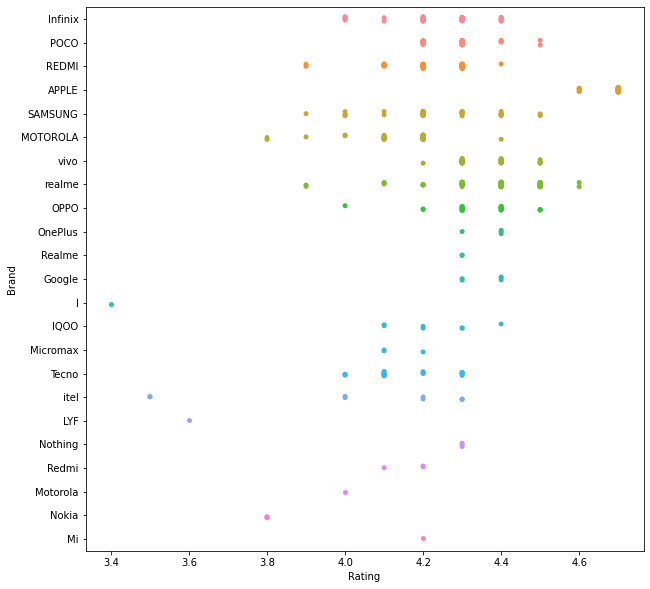

In [50]:
plt.figure(figsize=(10,10))
sns.stripplot(x='Rating',y='Brand',data=df)

<AxesSubplot:xlabel='Price', ylabel='RAM'>

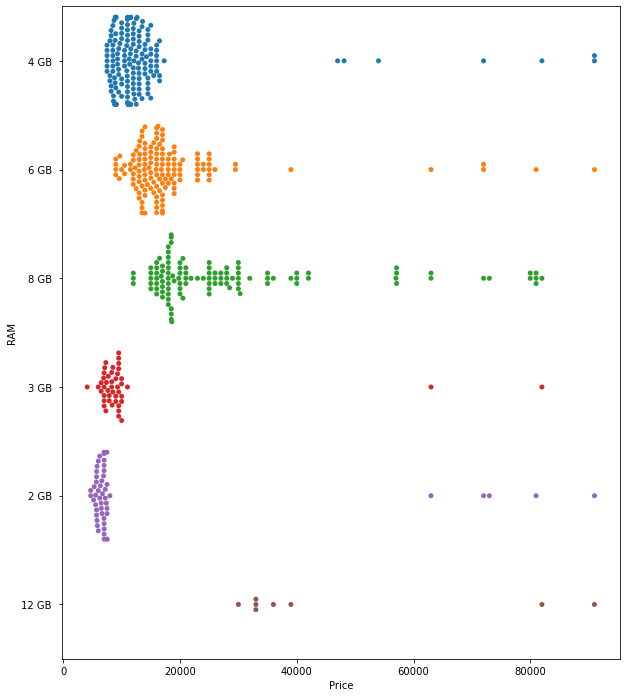

In [51]:
plt.figure(figsize=(10,12))
sns.swarmplot(x='Price',y='RAM',data=df)

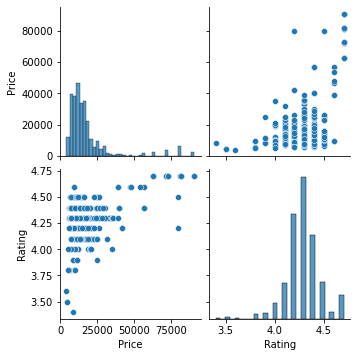

In [52]:
sns.pairplot(df)

<AxesSubplot:>

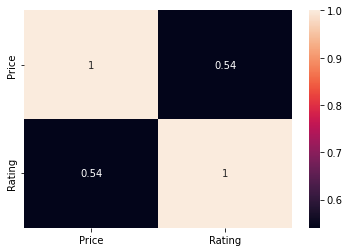

In [53]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [54]:
df.groupby(['Brand'],as_index=False).agg({'Price':['min','max','mean']})

Brand    Price                       
                  min      max          mean
0      APPLE  38999.0  90999.0  71658.375000
1     Google  29499.0  57099.0  46059.000000
2          I   8499.0   8499.0   8499.000000
3       IQOO  13999.0  31949.0  20247.142857
4    Infinix   5799.0  19999.0  11073.545455
5        LYF   4099.0   4099.0   4099.000000
6   MOTOROLA   6999.0  39999.0  14352.488372
7         Mi  20999.0  20999.0  20999.000000
8   Micromax   5999.0  11499.0   9665.666667
9   Motorola  34999.0  34999.0  34999.000000
10     Nokia   5199.0   5699.0   5532.333333
11   Nothing  26999.0  35999.0  30499.000000
12      OPPO   9499.0  29999.0  16862.769231
13   OnePlus  19975.0  35990.0  23987.750000
14      POCO   6249.0  29999.0  14780.250000
15     REDMI   6347.0  32999.0  15356.081967
16    Realme   5549.0   5549.0   5549.000000
17     Redmi   6975.0   7298.0   7189.000000
18   SAMSUNG   6610.0  79999.0  19590.086957
19     Tecno   6721.0  13995.0  10299.190476
20      itel   4699.0   6911.0   5590.333333
21    realme   5999.0  38999.0  14712.968421
22      vivo   7999.0  29990.0  15784.177778

<AxesSubplot:xlabel='Brand'>

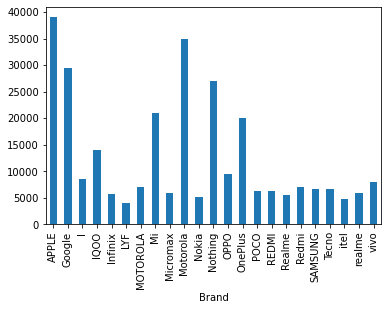

In [55]:
#minimun price of mobile in each brand
df.groupby(['Brand'])['Price'].min().plot(kind='bar')

<AxesSubplot:xlabel='Brand', ylabel='Rating'>

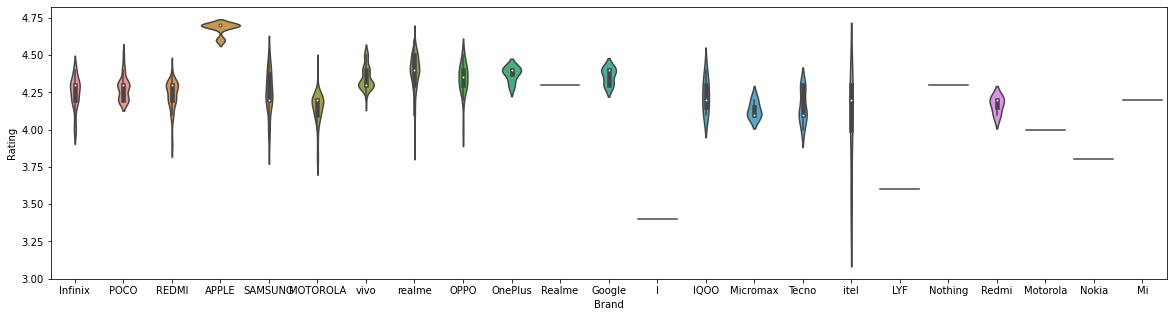

In [56]:
plt.figure(figsize=(20,5))
sns.violinplot(x='Brand',y='Rating',data=df)

## multi-variant analysis

<AxesSubplot:xlabel='Price', ylabel='Rating'>

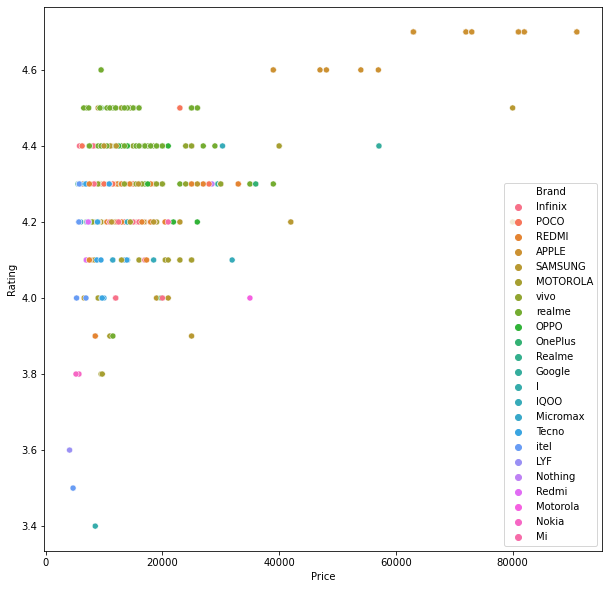

In [58]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Price',y='Rating',data=df,hue='Brand')

<AxesSubplot:xlabel='Price', ylabel='RAM'>

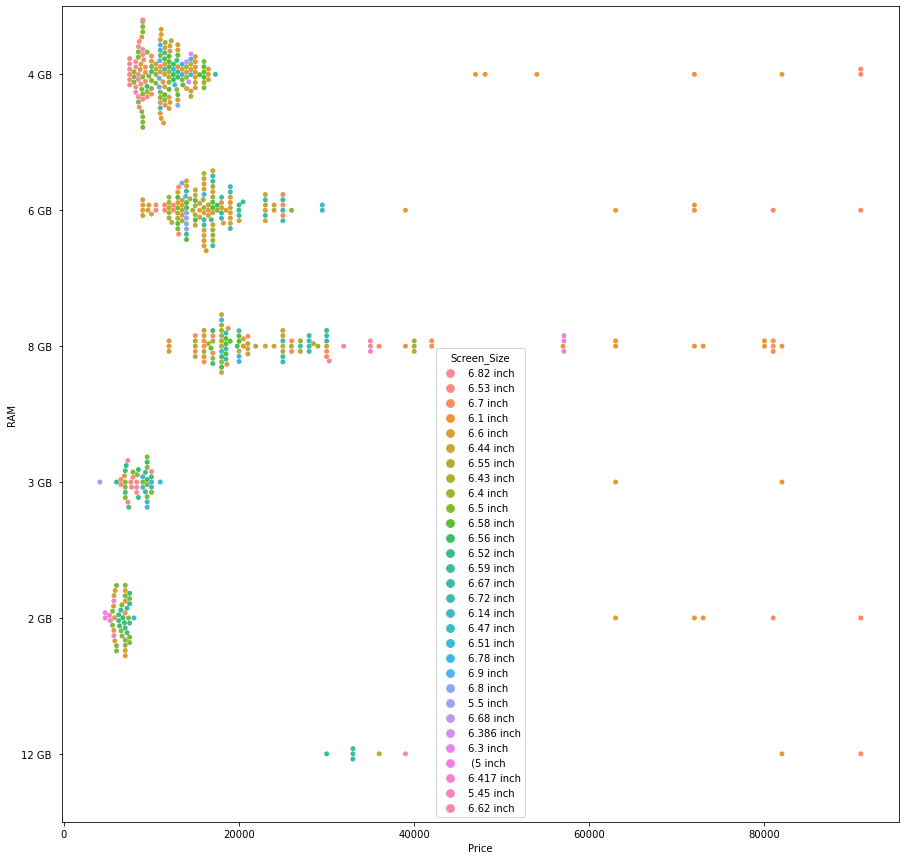

In [59]:
plt.figure(figsize=(15,15))
sns.swarmplot(x='Price',y='RAM',data=df,hue='Screen_Size')

<AxesSubplot:xlabel='Price', ylabel='RAM'>

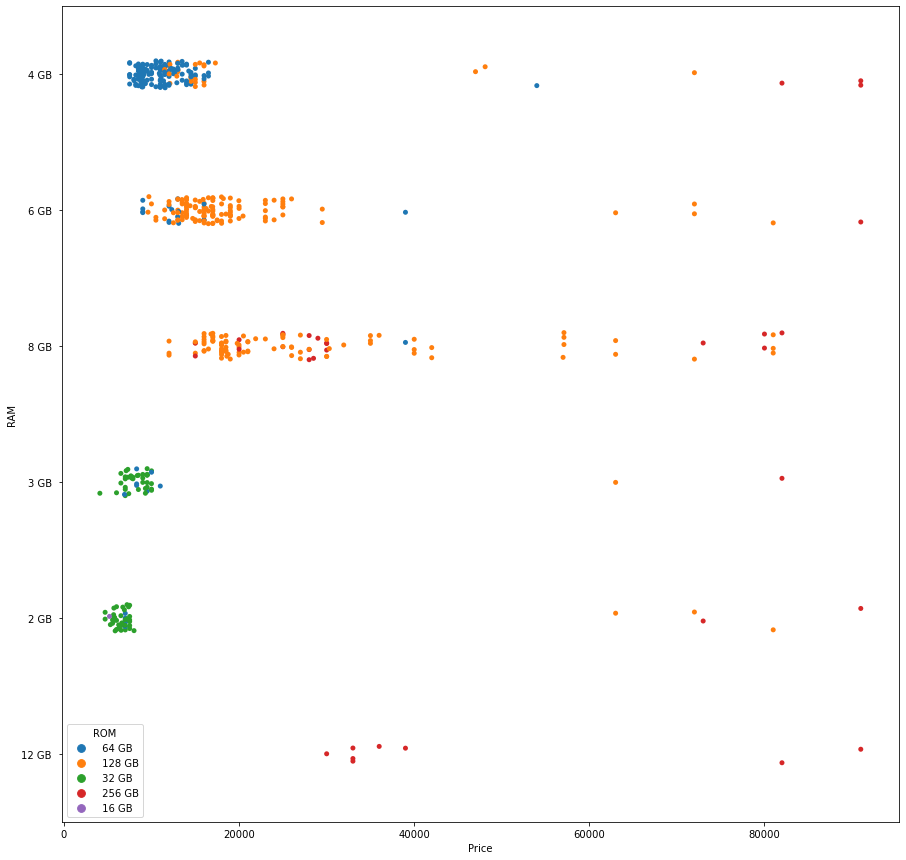

In [60]:
plt.figure(figsize=(15,15))
sns.stripplot(x='Price',y='RAM',data=df,hue='ROM')

<AxesSubplot:xlabel='Rating', ylabel='ROM'>

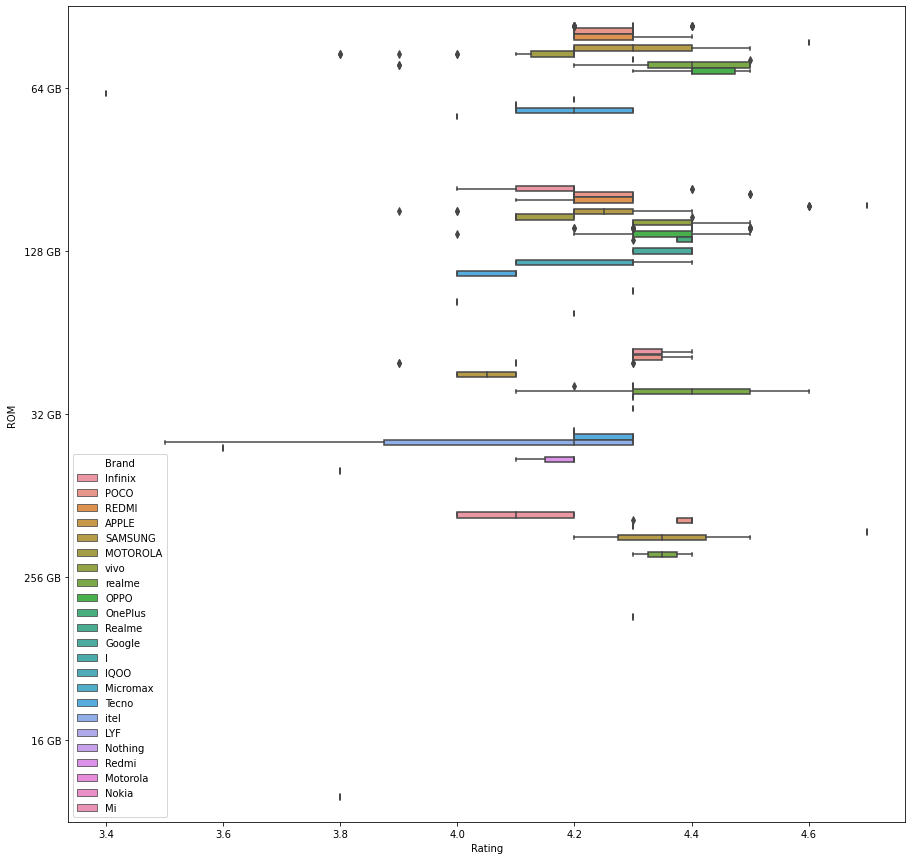

In [61]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Rating',y='ROM',data=df,hue="Brand")

In [62]:
#no.of mobiles available based on their RAM,ROM with respect to brands
plt.figure(figsize=(30,30))
pd.crosstab(df['Brand'], [df['ROM'], df['RAM']], rownames=['Brand'], colnames=['ROM', 'RAM'])

ROM       128 GB                          16 GB  256 GB                    \
RAM        2 GB  3 GB  4 GB  6 GB  8 GB   2 GB   12 GB  2 GB  3 GB  4 GB    
Brand                                                                       
APPLE          3     1     3     4     7      0       2     2     1     3   
Google         0     0     0     2     3      0       0     0     0     0   
I              0     0     0     0     0      0       0     0     0     0   
IQOO           0     0     0     2     3      0       0     0     0     0   
Infinix        0     0     0     5     9      0       0     0     0     0   
LYF            0     0     0     0     0      0       0     0     0     0   
MOTOROLA       0     0     0    13     8      0       0     0     0     0   
Mi             0     0     0     0     1      0       0     0     0     0   
Micromax       0     0     0     0     0      0       0     0     0     0   
Motorola       0     0     0     0     1      0       0     0     0     0   
Nokia          0     0     0     0     0      1       0     0     0     0   
Nothing        0     0     0     0     1      0       1     0     0     0   
OPPO           0     0     1     6    12      0       0     0     0     0   
OnePlus        0     0     0     3     1      0       0     0     0     0   
POCO           0     0     0    14    10      0       1     0     0     0   
REDMI          0     0     1    18     3      0       3     0     0     0   
Realme         0     0     0     0     0      0       0     0     0     0   
Redmi          0     0     0     0     0      0       0     0     0     0   
SAMSUNG        0     0     7    12     7      0       0     0     0     0   
Tecno          0     0     0     9     0      0       0     0     0     0   
itel           0     0     0     0     0      0       0     0     0     0   
realme         0     0     5    25    13      0       1     0     0     0   
vivo           0     0     9     9    12      0       0     0     0     0   

ROM                   32 GB        64 GB                          
RAM      6 GB  8 GB   2 GB  3 GB   2 GB  3 GB  4 GB  6 GB  8 GB   
Brand                                                             
APPLE        1     2      0     0      0     0     1     1     1  
Google       0     0      0     0      0     0     0     0     0  
I            0     0      0     0      0     0     1     0     0  
IQOO         0     0      0     0      0     0     2     0     0  
Infinix      0     4      3     0      4     3    21     6     0  
LYF          0     0      0     1      0     0     0     0     0  
MOTOROLA     0     0      0     0      2     0    20     0     0  
Mi           0     0      0     0      0     0     0     0     0  
Micromax     0     0      0     1      0     0     2     0     0  
Motorola     0     0      0     0      0     0     0     0     0  
Nokia        0     0      2     0      0     0     0     0     0  
Nothing      0     1      0     0      0     0     0     0     0  
OPPO         0     0      0     1      0     2     4     0     0  
OnePlus      0     0      0     0      0     0     0     0     0  
POCO         0     3      2     5      0     0     9     4     0  
REDMI        0     6      5     5      0     0    16     4     0  
Realme       0     0      2     0      0     0     0     0     0  
Redmi        0     0      1     2      0     0     0     0     0  
SAMSUNG      0     2      2     2      0     1    13     0     0  
Tecno        0     0      3     2      0     0     7     0     0  
itel         0     0      8     0      0     1     0     0     0  
realme       0     1     10    10      0     0    30     0     0  
vivo         0     0      1     6      0     1     7     0     0

<Figure size 2160x2160 with 0 Axes>

In [65]:
table=pd.pivot_table(df,values='Price',index=['Brand','RAM'],columns=['ROM'],aggfunc='min')

In [66]:
table.tail(20)
#here NaN means mobile not available with those specification

ROM              128 GB   16 GB   256 GB   32 GB    64 GB
Brand   RAM                                              
SAMSUNG 4 GB    11499.0     NaN      NaN     NaN   8891.0
        6 GB    15900.0     NaN      NaN     NaN      NaN
        8 GB    18753.0     NaN  79999.0     NaN      NaN
Tecno   2 GB        NaN     NaN      NaN  6721.0      NaN
        3 GB        NaN     NaN      NaN  7100.0      NaN
        4 GB        NaN     NaN      NaN     NaN   8699.0
        6 GB     9599.0     NaN      NaN     NaN      NaN
itel    2 GB        NaN     NaN      NaN  4699.0      NaN
        3 GB        NaN     NaN      NaN     NaN   6911.0
realme  12 GB       NaN     NaN  38999.0     NaN      NaN
        2 GB        NaN     NaN      NaN  5999.0      NaN
        3 GB        NaN     NaN      NaN  6999.0      NaN
        4 GB    11999.0     NaN      NaN     NaN   8499.0
        6 GB    13999.0     NaN      NaN     NaN      NaN
        8 GB    16999.0     NaN  28999.0     NaN      NaN
vivo    2 GB        NaN     NaN      NaN  7999.0      NaN
        3 GB        NaN     NaN      NaN  8999.0  10999.0
        4 GB    12999.0     NaN      NaN     NaN  11999.0
        6 GB    14999.0     NaN      NaN     NaN      NaN
        8 GB    16790.0     NaN      NaN     NaN      NaN

In [67]:
pd.pivot_table(df,values='Price',index=['Brand'],columns=['ROM'],aggfunc='min')

ROM,128 GB,16 GB,256 GB,32 GB,64 GB
Brand,,,,,
APPLE,46999.0,NaN,72999.0,NaN,38999.0
Google,29499.0,NaN,NaN,NaN,NaN
I,NaN,NaN,NaN,NaN,8499.0
IQOO,16239.0,NaN,NaN,NaN,13999.0
Infinix,11999.0,NaN,14999.0,5799.0,6999.0
LYF,NaN,NaN,NaN,4099.0,NaN
MOTOROLA,11999.0,NaN,NaN,NaN,6999.0
Mi,20999.0,NaN,NaN,NaN,NaN
Micromax,NaN,NaN,NaN,5999.0,11499.0


In [68]:
pd.pivot_table(df,values='Price',index=['Brand','Rating'],columns=['ROM'],aggfunc='min')

ROM             128 GB   16 GB   256 GB   32 GB    64 GB
Brand  Rating                                           
APPLE  4.6     46999.0     NaN      NaN     NaN  38999.0
       4.7     62999.0     NaN  72999.0     NaN      NaN
Google 4.3     29499.0     NaN      NaN     NaN      NaN
       4.4     57099.0     NaN      NaN     NaN      NaN
I      3.4         NaN     NaN      NaN     NaN   8499.0
...                ...     ...      ...     ...      ...
realme 4.6         NaN     NaN      NaN  9499.0      NaN
vivo   4.2         NaN     NaN      NaN  7999.0      NaN
       4.3     15499.0     NaN      NaN  8999.0  10999.0
       4.4     14999.0     NaN      NaN     NaN      NaN
       4.5     12999.0     NaN      NaN     NaN  11999.0

[72 rows x 5 columns]

In [97]:
df[(df['Price']<25000.0) & (df['Brand']=='samsung') & (df['Rating']>4.0)].head(10)

,Product_Name,Price,Rating,Features,Color,Brand,ROM,RAM,Screen_Size
9,SAMSUNG Galaxy F13,11099.0,4.4,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,blue,samsung,64 GB,4 GB,6.6 inch
21,SAMSUNG Galaxy F13,11099.0,4.4,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,green,samsung,64 GB,4 GB,6.6 inch
24,SAMSUNG Galaxy F23 5G,15999.0,4.3,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,blue,samsung,128 GB,6 GB,6.6 inch
27,SAMSUNG Galaxy F23 5G,15999.0,4.3,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,green,samsung,128 GB,6 GB,6.6 inch
34,SAMSUNG Galaxy F04,8999.0,4.5,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,green,samsung,64 GB,4 GB,6.5 inch
35,SAMSUNG Galaxy F23 5G,15999.0,4.3,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,blush,samsung,128 GB,6 GB,6.6 inch
38,SAMSUNG Galaxy F13,11099.0,4.4,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,copper,samsung,64 GB,4 GB,6.6 inch
41,SAMSUNG Galaxy F13,12099.0,4.4,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,green,samsung,128 GB,4 GB,6.6 inch
43,SAMSUNG Galaxy F04,8999.0,4.5,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,purple,samsung,64 GB,4 GB,6.5 inch
50,SAMSUNG Galaxy F13,12099.0,4.4,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,blue,samsung,128 GB,4 GB,6.6 inch
